##Sea Level Prediction Project

Task & Data Source: https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

###Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import numpy as np

###Preliminary Data Exploration

Use Pandas to import the data from epa-sea-level.csv.

In [ ]:
df = pd.read_csv("epa-sea-level.csv")

In [ ]:
df.sample(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
131,2011,8.964567,8.661417,9.267717,8.053065
57,1937,2.519685,2.055118,2.984252,NaN
42,1922,1.952756,1.433071,2.472441,NaN
73,1953,4.043307,3.748031,4.338583,NaN
41,1921,1.988189,1.472441,2.503937,NaN


###Data Visualization

Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.

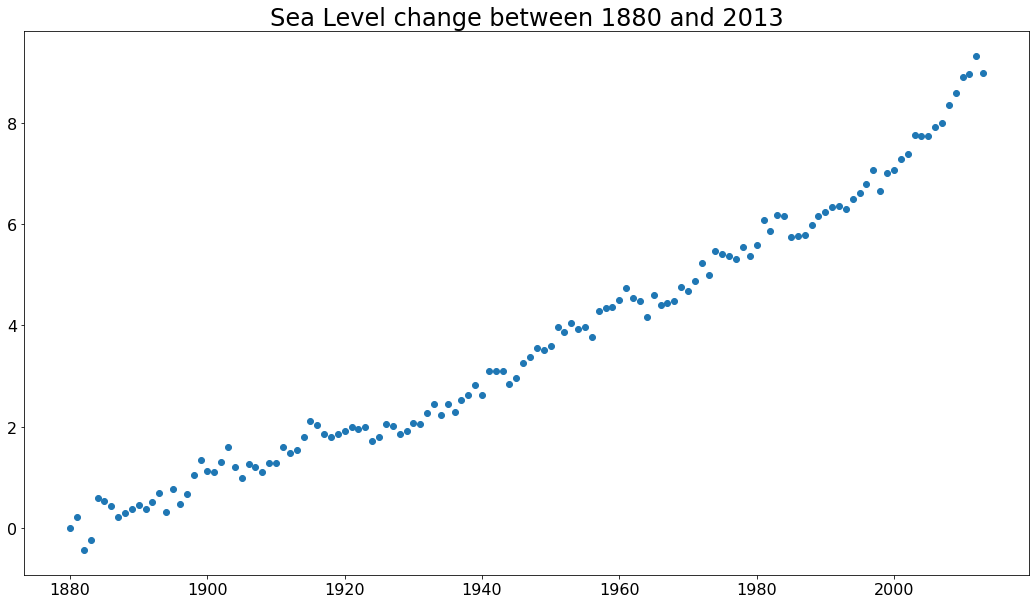

In [ ]:
plt.figure(figsize=(18, 10))
plt.scatter(data=df, y="CSIRO Adjusted Sea Level", x="Year")
plt.title("Sea Level change between 1880 and 2013", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

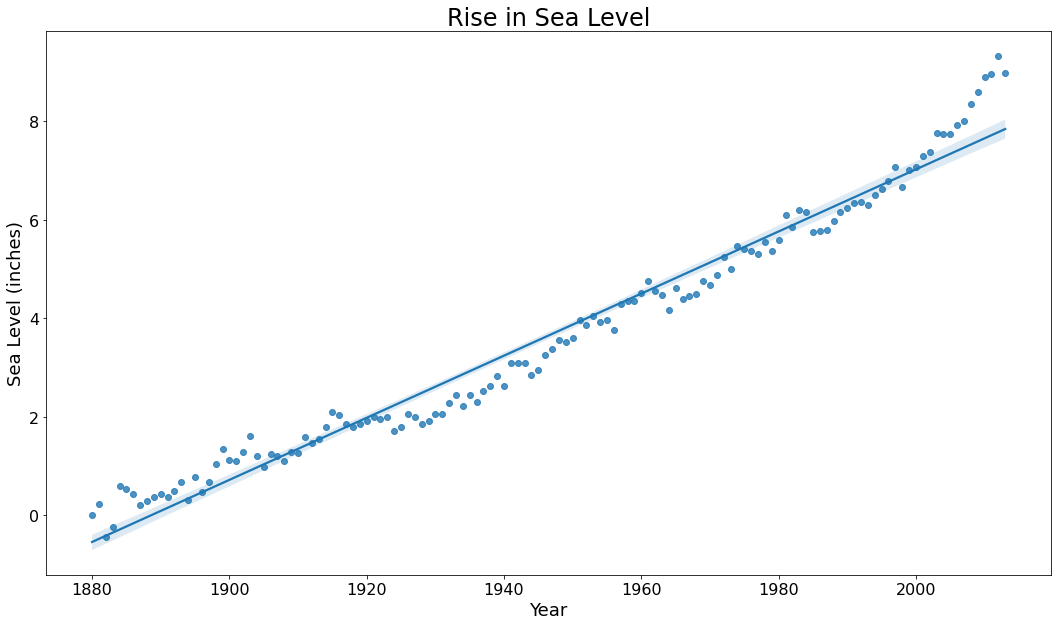

In [ ]:
plt.figure(figsize=(18, 10))
sns.regplot(data=df, y="CSIRO Adjusted Sea Level", x="Year")
plt.title("Rise in Sea Level", fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sea Level (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

###**Regression Model One** based on 1880-2013

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

####Generated Regression One

In [ ]:
result = linregress(df.Year, y=df["CSIRO Adjusted Sea Level"])
print("The slope: {}".format(result.slope))
print("The intercept: {}".format(result.intercept))
print("The r-value: {}".format(result.rvalue))
print("The standart intercept error: {}".format(result.intercept_stderr))
print("The standard slope error: {}".format(result.stderr))

The slope: 0.0630445840121348
The intercept: -119.06594196773978
The r-value: 0.984757131182585
The standart intercept error: 1.8869433812425225
The standard slope error: 0.000969211871328715


####Regression One Visualisation

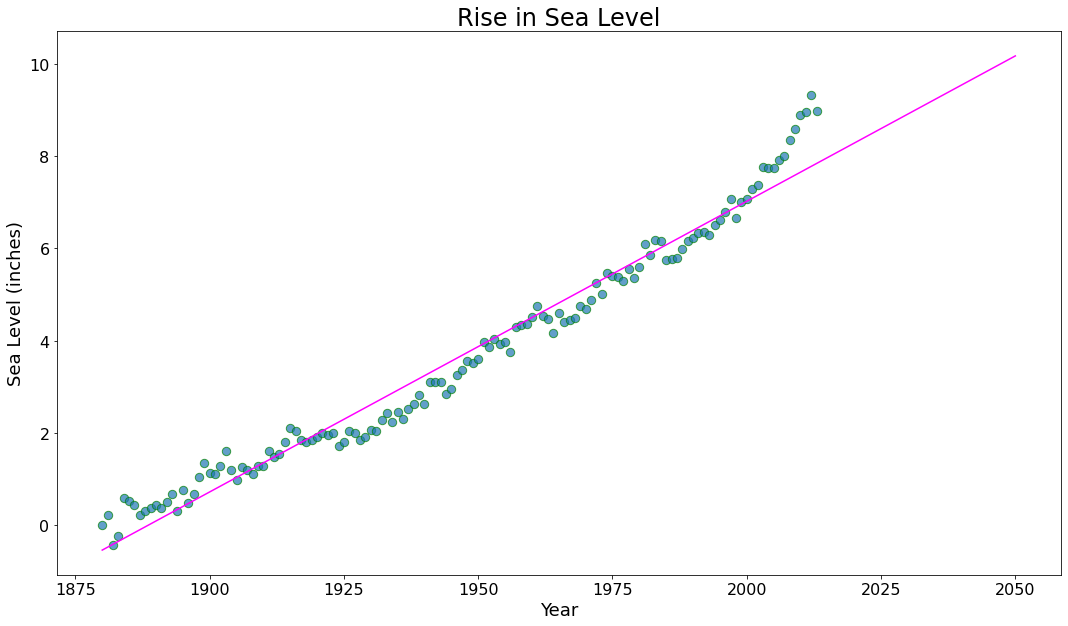

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(data=df, y="CSIRO Adjusted Sea Level", x="Year", alpha=0.7, edgecolors="green", s=70)
years = np.arange(1880, 2051)
ax.plot(years, result.intercept + result.slope * years, color="magenta")
plt.title("Rise in Sea Level", fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sea Level (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

####Estimated Sea Level in 2050 according to the **model one**

In [ ]:
level_2050 = result.intercept + result.slope * 2050
print("Estimated Sea Level in 2050 (inches): {}".format(level_2050))

Estimated Sea Level in 2050 (inches): 10.175455257136548


###**Regression Model Two** based on 1880-2013

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

####Generated Regression Two

In [ ]:
df_2000 = df.loc[df.Year >= 2000]
result_2fit = linregress(df_2000.Year, y=df_2000["CSIRO Adjusted Sea Level"])
print("The slope: {}".format(result_2fit.slope))
print("The intercept: {}".format(result_2fit.intercept))
print("The r-value: {}".format(result_2fit.rvalue))
print("The standart intercept error: {}".format(result_2fit.intercept_stderr))
print("The standard slope error: {}".format(result_2fit.stderr))

The slope: 0.1664272733318682
The intercept: -325.7934668059649
The r-value: 0.9762875716140618
The standart intercept error: 21.375153425608215
The standard slope error: 0.010652933111541163


####Regression Two Line Plot

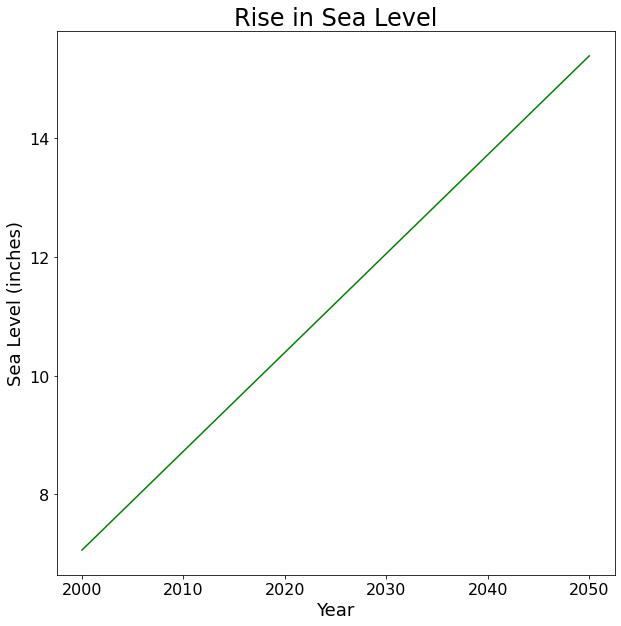

In [ ]:
plt.figure(figsize=(10, 10))
years = np.arange(2000, 2051)
plt.plot(years, result_2fit.intercept + result_2fit.slope * years, color="green")
plt.title("Rise in Sea Level", fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sea Level (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

####Estimated Sea Level in 2050 according to the **model two**

In [ ]:
level_2050_2 = result_2fit.intercept + result_2fit.slope * 2050
print("Estimated Sea Level in 2050 (inches): {}".format(level_2050_2))

Estimated Sea Level in 2050 (inches): 15.382443524364874


###Two Regression Models Visualisation

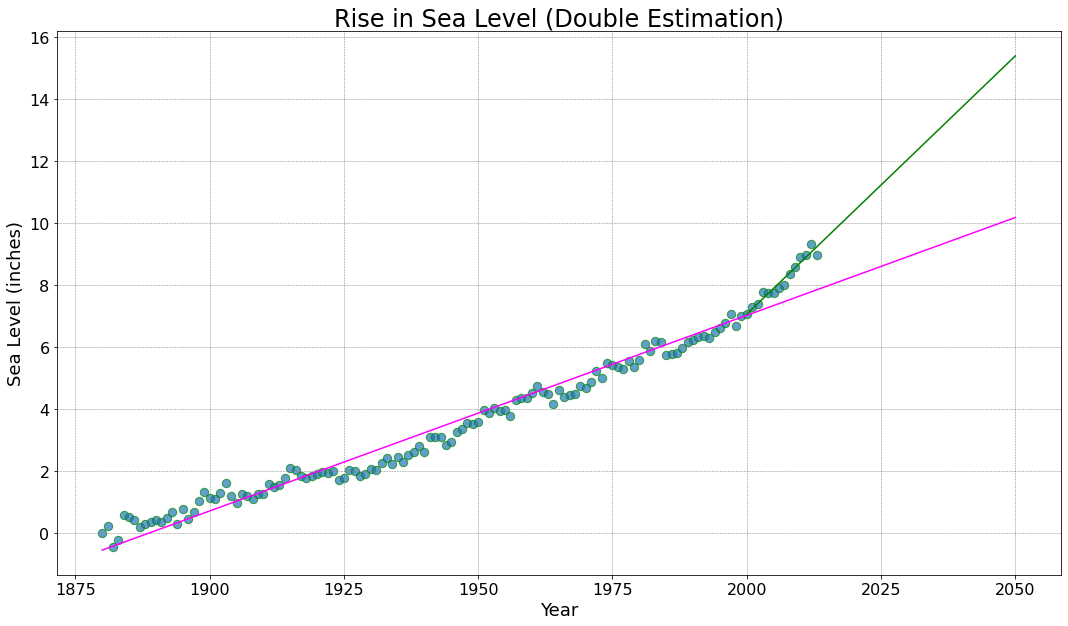

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))

ax.scatter(data=df, y="CSIRO Adjusted Sea Level", x="Year", alpha=0.7, edgecolors="green", s=70)

all_years = np.arange(1880, 2051)
ax.plot(all_years, result.intercept + result.slope * all_years, color="magenta")

new_years = np.arange(2000, 2051)
ax.plot(new_years, result_2fit.intercept + result_2fit.slope * new_years, color="green")

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title("Rise in Sea Level (Double Estimation)", fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sea Level (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('sea_level_plot.png')
plt.savefig('sea_level_plot.pdf')

plt.show()

